In [15]:
from __future__ import print_function
from skimage import io,data,color,exposure,img_as_float
from skimage.transform import resize
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('classic')

/home/mixslice/.virtualenvs/keras/local/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


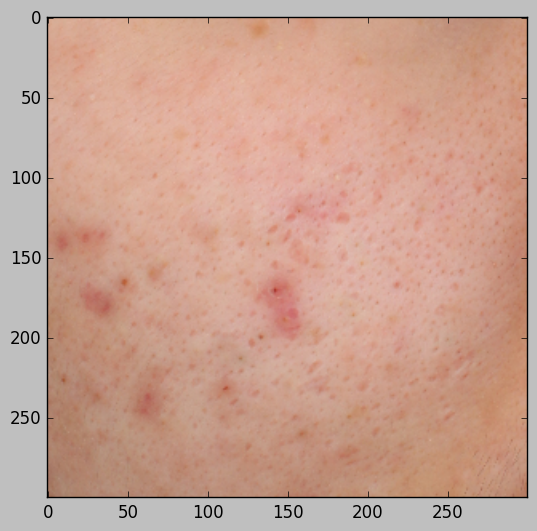

In [17]:
img = io.imread('/home/mixslice/Develop/cskin/skimage_example/auto_examples_jupyter/test_image.jpg')
# 改变尺寸
img = resize(img,(300,300))

# uint8 -- float64 彩色变成灰度，则range（0，255）－－（0，1）
img = img_as_float(img)
# print (img.dtype.name)

plt.imshow(img)
plt.show()

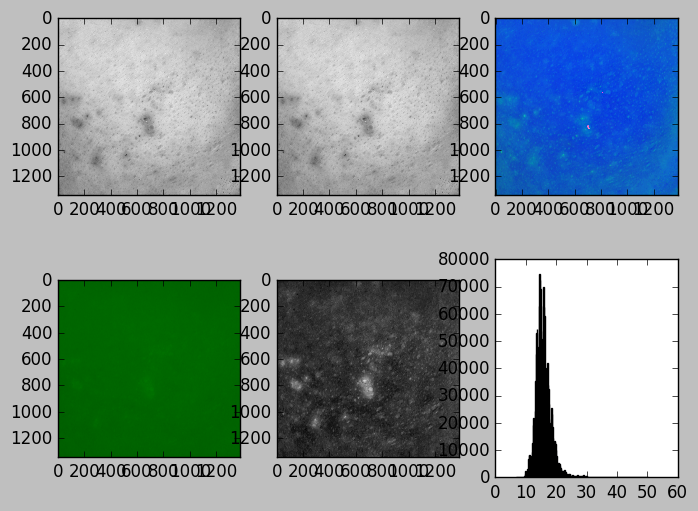

In [19]:
# 颜色转换
img = io.imread('/home/mixslice/Develop/cskin/skimage_example/auto_examples_jupyter/test_image.jpg')
img_gray = color.rgb2gray(img)      # 灰度
img_grey = color.rgb2grey(img)      # 灰度,英美读法
img_hsv = color.rgb2hsv(img)        # 六角锥颜色模型，参数分别是：色调（H），饱和度（S），明度（V）
img_lab = color.rgb2lab(img)        #Lab色彩模型是，参数：L表示明度，a表示从洋红色至绿色的范围，b表示从黄色至蓝色的范围
img_hed = color.rgb2hed(img)
img_ch = img_lab[:,:,1] 
# img_ch_byte = img_ch.astype(np.uint16) # ?? 为什么

plt.subplot(231),plt.imshow(img_gray,cmap='gray') 
plt.subplot(232),plt.imshow(img_grey,cmap='gray')              
plt.subplot(233),plt.imshow(img_hsv)     
plt.subplot(234),plt.imshow(img_hed)
plt.subplot(235),plt.imshow(img_ch,cmap='gray')   
plt.subplot(236), plt.hist(img_ch.ravel(), bins=256)

# 简洁方法 
# image_hsv = color.convert_colorspace(img, 'RGB', 'HSV')
# plt.imshow(image_hsv)

plt.show()

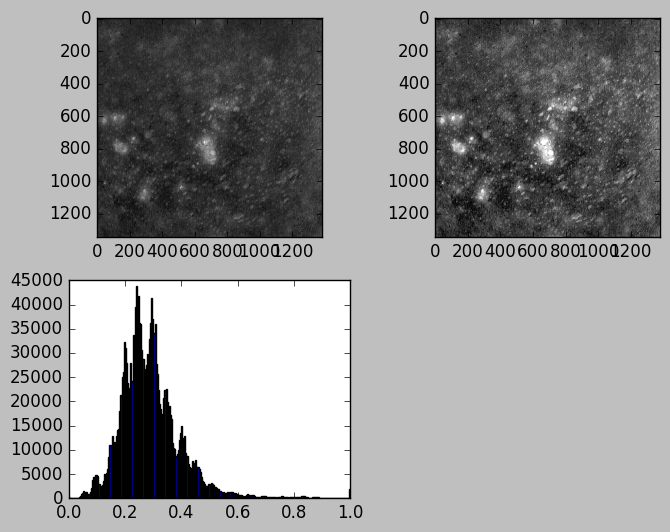

In [22]:
p2, p98 = np.percentile(img_ch, (0.01, 99.9))
ch1 = exposure.rescale_intensity(img_ch, in_range=(p2, p98))
ch1_byte = ch1.astype(np.uint16)

plt.subplot(221), plt.imshow(img_ch,cmap='gray')
plt.subplot(222), plt.imshow(ch1, cmap='gray')
plt.subplot(223), plt.hist(ch1.ravel(), bins=256)
plt.show()

0.330078125


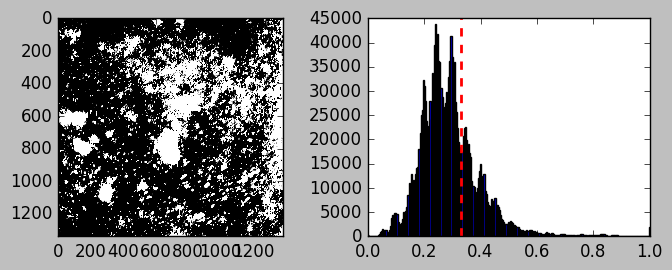

In [23]:
from skimage.filters import threshold_otsu, rank  # 过滤

val = threshold_otsu(ch1)   # 自动获取阈值
print (val)
mask = ch1 > val        # 可人工设置

plt.subplot(221), plt.imshow(mask, cmap='gray')
plt.subplot(222), plt.hist(ch1.ravel(), bins=256)
plt.axvline(val, color='r', linestyle='dashed', linewidth=2)
plt.show()

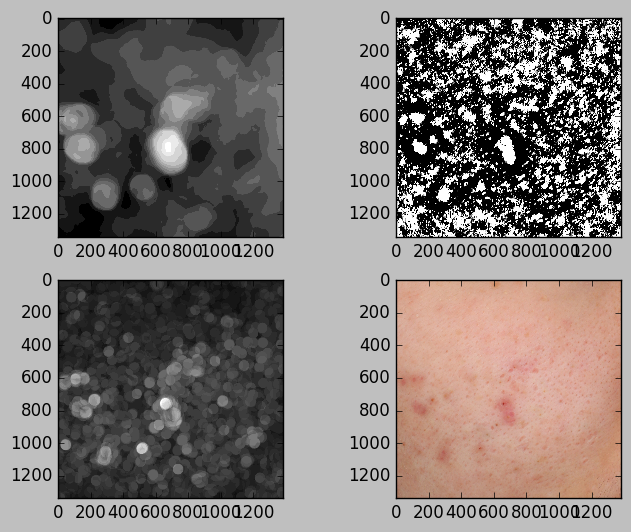

In [24]:
from skimage.morphology import disk, dilation, closing, watershed

local_otsu = rank.otsu(img_ch_byte, disk(80))  # 局部阈值
mask = img_ch_byte > local_otsu
grad = rank.gradient(img_ch_byte, disk(30))

plt.subplot(221), plt.imshow(local_otsu, cmap='gray')
plt.subplot(222), plt.imshow(mask, cmap='gray')
plt.subplot(223), plt.imshow(grad, cmap='gray')
plt.subplot(224), plt.imshow(img)
plt.show()

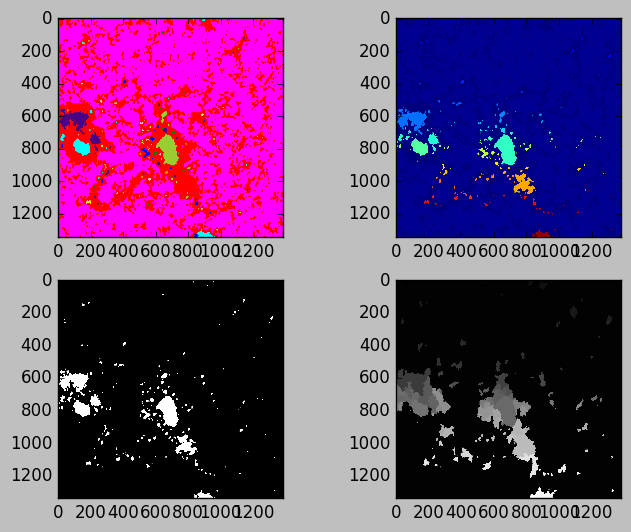

In [28]:
from skimage.measure import label     
# 同属于 morphology 方法内容
dil = dilation(mask, disk(3))
close = closing(dil, disk(3))
## 
lbl = label(close)
color_lbl = color.label2rgb(lbl)
# ws = watershed(ch1, lbl)
# io.imsave('ok.jpg',lbl>2,cmap='gray')
plt.subplot(221), plt.imshow(color_lbl)
plt.subplot(222), plt.imshow(lbl)
plt.subplot(223), plt.imshow(lbl > 7, cmap='gray')
plt.subplot(224), plt.imshow(ws, cmap='gray')
plt.show()

In [ ]:
# 1／噪点太多，需要在某个步骤加强
# 2／uint8－－uint16 为什么要这么做
# 3／颜色通道还不够熟练

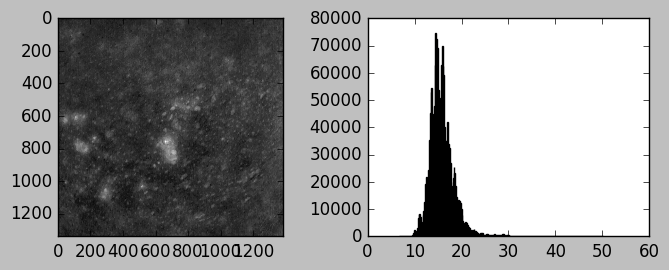

In [44]:
lab = color.rgb2lab(img)
ch = lab[:,:,1]
ch_byte = ch.astype(np.uint16)

plt.subplot(221), plt.imshow(ch, cmap='gray')
plt.subplot(222), plt.hist(ch.ravel(), bins=256)
plt.show()

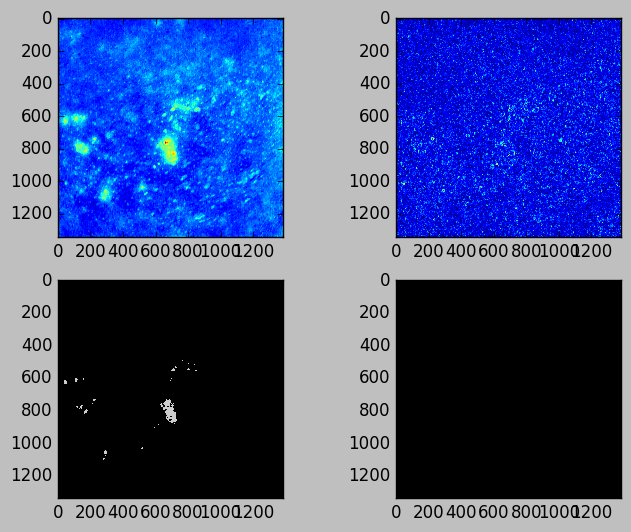

In [56]:
elevation_map_test = sobel(ch)
marker_test = np.zeros_like(ch)
marker_test[ch < 3] = 1
marker_test[ch > 28] = 2
segmentation_test = watershed(elevation_map_test,marker_test)
plt.subplot(221),plt.imshow(ch)
plt.subplot(222),plt.imshow(elevation_map_test)
plt.subplot(223),plt.imshow(marker_test,cmap='nipy_spectral', interpolation='nearest')
plt.subplot(224),plt.imshow(segmentation_test, cmap='gray', interpolation='nearest')
plt.show()

In [58]:
close_test = closing(marker_test,disk(50))
plt.subplot(221),plt.imshow(ch)
plt.subplot(222),plt.imshow(close_test,cmap='gray')
plt.show()

In [2]:
from __future__ import print_function

from skimage import io, color, exposure
from skimage.transform import resize
from skimage.morphology import disk, dilation, closing, watershed
from skimage.measure import label
from skimage.feature import peak_local_max
from skimage.filters import threshold_otsu, rank, sobel
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('classic')

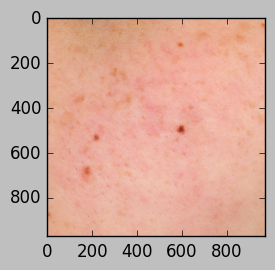

In [3]:
img = io.imread('/home/mixslice/Develop/cskin/skimage_example/auto_examples_jupyter/sample.jpg')
# img_red = io.imread('sample/redspot_2.jpg')

plt.subplot(221), plt.imshow(img)
# plt.subplot(222), plt.imshow(img_red)
plt.show()

img = resize(img, (500, 500), mode='reflect')
# img_red = resize(img_red, (500, 500), mode='reflect')

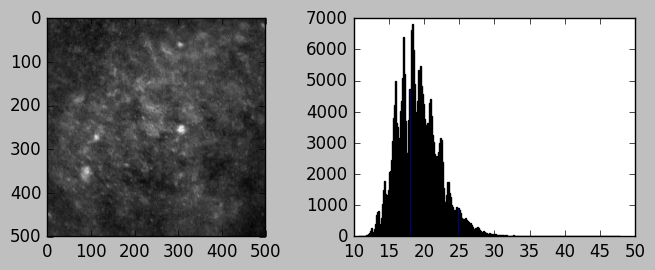

In [4]:
lab = color.rgb2lab(img)
ch = lab[:,:,1]
ch_byte = ch.astype(np.uint16)

plt.subplot(221), plt.imshow(ch, cmap='gray')
plt.subplot(222), plt.hist(ch.ravel(), bins=256)
plt.show()

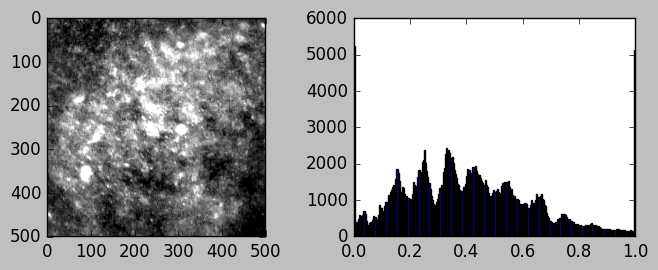

In [5]:
p2, p98 = np.percentile(ch, (2, 98))
ch1 = exposure.rescale_intensity(ch, in_range=(p2, p98))

plt.subplot(221), plt.imshow(ch1, cmap='gray')
plt.subplot(222), plt.hist(ch1.ravel(), bins=256)
plt.show()

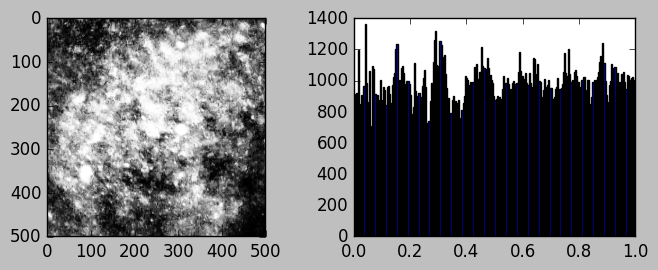

In [6]:
ch2 = exposure.equalize_hist(ch)

plt.subplot(221), plt.imshow(ch2, cmap='gray')
plt.subplot(222), plt.hist(ch2.ravel(), bins=256)
plt.show()

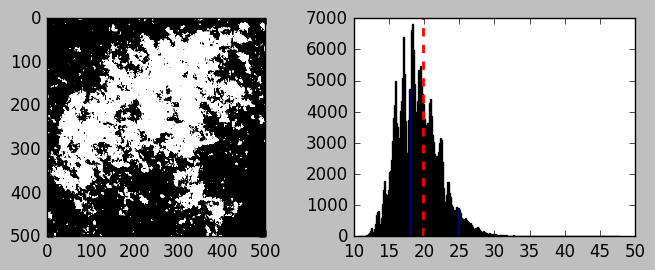

In [7]:
val = threshold_otsu(ch)
mask = ch > val

plt.subplot(221), plt.imshow(mask, cmap='gray')
plt.subplot(222), plt.hist(ch.ravel(), bins=256)
plt.axvline(val, color='r', linestyle='dashed', linewidth=2)
plt.show()

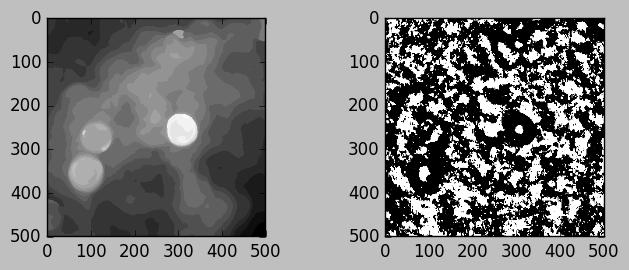

In [8]:
local_otsu = rank.otsu(ch_byte, disk(35))
mask = ch_byte > local_otsu

plt.subplot(221), plt.imshow(local_otsu, cmap='gray')
plt.subplot(222), plt.imshow(mask, cmap='gray')
plt.show()

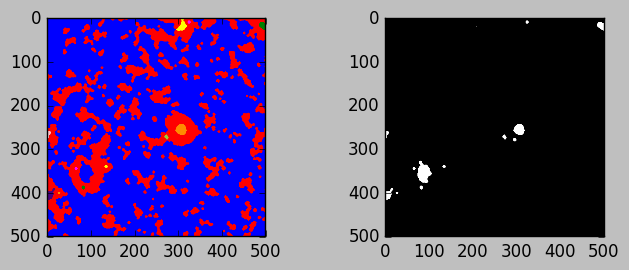

In [9]:
dil = dilation(mask, disk(3))
close = closing(dil, disk(3))
lbl = label(close)
color_lbl = color.label2rgb(lbl)

plt.subplot(221), plt.imshow(color_lbl)
plt.subplot(222), plt.imshow(lbl > 2, cmap='gray')
plt.show()

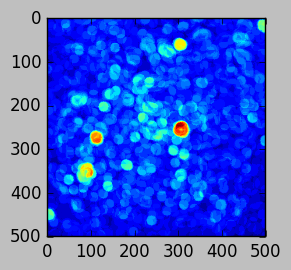

In [10]:
grad = rank.gradient(ch_byte, disk(10))
plt.subplot(221), plt.imshow(grad)
plt.show()

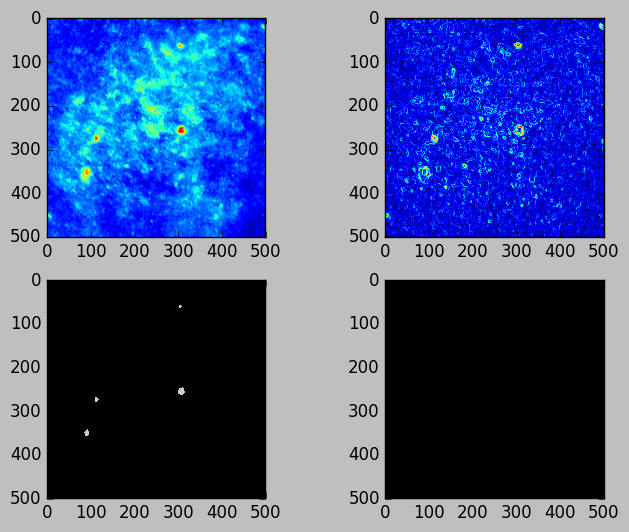

In [12]:
elevation_map = sobel(ch)
markers = np.zeros_like(ch)
markers[ch < 3] = 1
markers[ch > 35] = 2
segmentation = watershed(elevation_map, markers)

plt.subplot(221), plt.imshow(ch)
plt.subplot(222), plt.imshow(elevation_map)
plt.subplot(223), plt.imshow(markers, cmap='nipy_spectral', interpolation='nearest')
plt.subplot(224), plt.imshow(segmentation, cmap='gray', interpolation='nearest')

plt.show()